In [21]:
%load_ext autoreload
%matplotlib inline

import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import time, datetime
import os
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor

plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


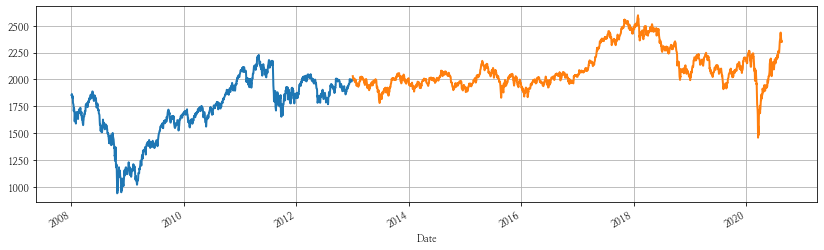

In [5]:
%autoreload
# KS11 (KOSPI 지수)
df_kospi_train = fdr.DataReader('KS11', '2008-01-01', '2012-12-31')
df_kospi_test = fdr.DataReader('KS11', '2013-01-01')
df_kospi_train['Close'].plot()
df_kospi_test['Close'].plot()

7488


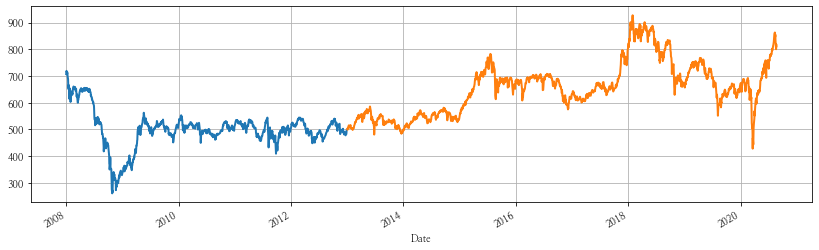

In [65]:
%autoreload
# KQ11 (KOSDAQ 지수)
df_kosdaq_train = fdr.DataReader('KQ11', '2008-01-01', '2012-12-31')
df_kosdaq_test = fdr.DataReader('KQ11', '2013-01-01')
df_kosdaq_train['Close'].plot()
df_kosdaq_test['Close'].plot()
print(df_kosdaq_train.size)

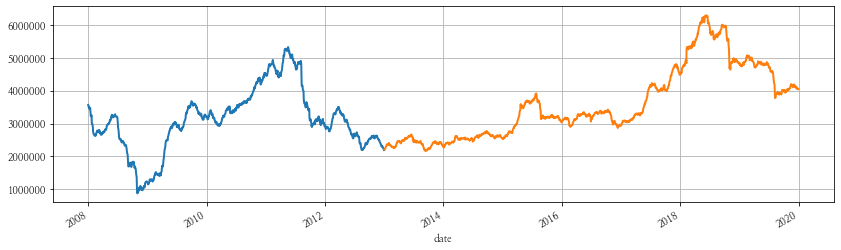

In [86]:
%autoreload

filePath = "data/equity_credit_history.csv"
data = pd.read_csv(filePath)
datetime_index = pd.to_datetime(data['date'])
df_credit=data.set_index(datetime_index)
df_credit_train = df_credit[(df_credit.index > '2008-01-01') & (df_credit.index <= '2012-12-31')]
df_credit_test = df_credit[(df_credit.index > '2012-12-31') & (df_credit.index <= '2019-12-31')]
df_credit_train['loan.kospi'].plot()
df_credit_test['loan.kospi'].plot()

In [132]:
df_credit_train = df_credit_train.loc[df_kosdaq_train.index]
df_credit_test = df_credit_test.loc[df_credit_test.index.intersection(df_kosdaq_test.index)]
df_kosdaq_test = df_kosdaq_test.loc[df_credit_test.index.intersection(df_kosdaq_test.index)]

X_train = np.array(df_credit_train['loan.kospi']).reshape(-1,1)
y_train = np.array(df_kosdaq_train['Close'])
X_test = np.array(df_credit_test['loan.kospi']).reshape(-1,1)
y_test = np.array(df_kosdaq_test['Close'])
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_train)
print(y_train)
regr = MLPRegressor(hidden_layer_sizes=(64,64,64,64),
                                           activation='relu',
                                           solver='lbfgs',
                                           learning_rate='constant',
                                           max_iter=2000,
                                           learning_rate_init=0.001,
                                           alpha=0.01,
                                           tol = 1e-6,
                                           verbose=False).fit(X_train, y_train)

(1248, 1)
(1248,)
(1720, 1)
(1720,)
[[3566371]
 [3547533]
 [3512977]
 ...
 [2251040]
 [2238920]
 [2218076]]
[707.12 714.   719.25 ... 482.76 492.08 496.32]


In [151]:
# X_train.size
from sklearn.metrics import r2_score
y_predict_train = regr.predict(X_train)
y_predict_test = regr.predict(X_test)
def prediction_error(Y_hat, Y):
    return np.sqrt(np.mean(np.power(Y_hat-Y,2)))
print("train prediction error(RMSE):", r2_score(y_train, y_predict_train))
print("test prediction error(RMSE):", r2_score(y_test, y_predict_test))

train prediction error(RMSE): -2.7235813190068137
test prediction error(RMSE): -1.2372373030657022


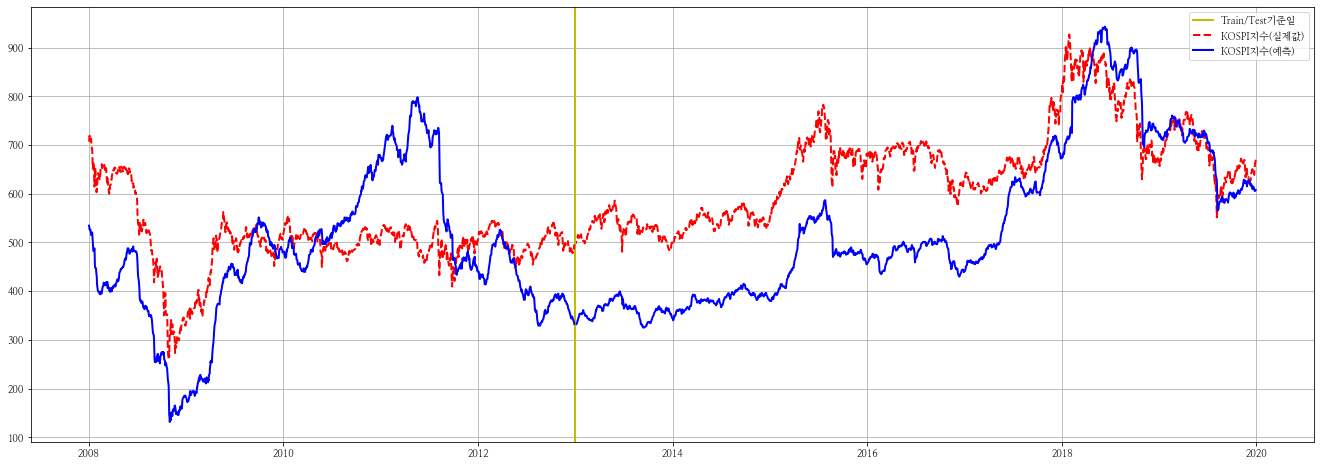

In [146]:
fig = plt.figure(figsize=(23,8))
# plt.plot(df_credit_train.index, y_predict_train)
plt.plot(df_credit_test.index, y_test, color='r', linestyle='--')
plt.plot(df_credit_test.index, y_predict_test, color='b', linestyle='-')
plt.axvline(pd.to_datetime('2013-01-01'), label='Train/Test기준일', color='y')
plt.plot(df_credit_train.index, y_train, color='r', linestyle='--', label='KOSPI지수(실제값)')
plt.plot(df_credit_train.index, y_predict_train, color='b', linestyle='-', label='KOSPI지수(예측)')
plt.legend()
plt.show()